In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
data = pd.read_csv('/content/pima-indians-diabetes.csv')

In [1]:
data.head()  

NameError: ignored

In [ ]:
data.columns = ['preg', 'plas', 'pres', 'skin','test', 'mass', 'pedi', 'age', 'class']
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    767 non-null    int64  
 1   plas    767 non-null    int64  
 2   pres    767 non-null    int64  
 3   skin    767 non-null    int64  
 4   test    767 non-null    int64  
 5   mass    767 non-null    float64
 6   pedi    767 non-null    float64
 7   age     767 non-null    int64  
 8   class   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
arr = data.values
arr

array([[1.00e+00, 8.50e+01, 6.60e+01, ..., 3.51e-01, 3.10e+01, 0.00e+00],
       [8.00e+00, 1.83e+02, 6.40e+01, ..., 6.72e-01, 3.20e+01, 1.00e+00],
       [1.00e+00, 8.90e+01, 6.60e+01, ..., 1.67e-01, 2.10e+01, 0.00e+00],
       ...,
       [5.00e+00, 1.21e+02, 7.20e+01, ..., 2.45e-01, 3.00e+01, 0.00e+00],
       [1.00e+00, 1.26e+02, 6.00e+01, ..., 3.49e-01, 4.70e+01, 1.00e+00],
       [1.00e+00, 9.30e+01, 7.00e+01, ..., 3.15e-01, 2.30e+01, 0.00e+00]])

### Classification Accuracy

In [ ]:
X = arr[:, 0:8]
y = arr[:, 8]

k_fold = KFold(n_splits=10, random_state=42, shuffle=True)
model = LogisticRegression(max_iter=500)

results = cross_val_score(model, X, y, cv=k_fold, scoring='accuracy')

In [ ]:
results.mean()

0.7769651401230349

### Log Loss

In [ ]:
results = cross_val_score(model, X, y, cv=k_fold, scoring='neg_log_loss')

In [ ]:
results.mean()

-0.4835547100046229

### AUC Score

In [ ]:
results = cross_val_score(model, X, y, cv=k_fold, scoring='roc_auc')

In [ ]:
results.mean()

0.8284026987013122

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=700, shuffle=True)

In [ ]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, pred)

array([[139,  17],
       [ 25,  50]])

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       156
         1.0       0.75      0.67      0.70        75

    accuracy                           0.82       231
   macro avg       0.80      0.78      0.79       231
weighted avg       0.81      0.82      0.82       231



In [ ]:
roc_auc_score(y_test, pred)

0.7788461538461537

In [ ]:
import numpy as np

fpr, tpr, thresholds = roc_curve(y_test, pred)

In [ ]:
fpr

array([0.        , 0.10897436, 1.        ])

In [ ]:
tpr

array([0.        , 0.66666667, 1.        ])

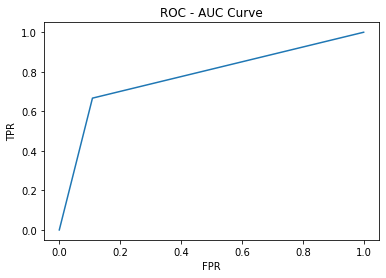

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.title('ROC - AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()